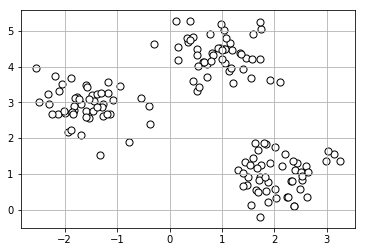

In [6]:
from sklearn.datasets import make_blobs
X, y= make_blobs(n_samples=150,
                n_features=2,
                centers=3,
                cluster_std=0.5,
                shuffle=True,
                random_state=0)
import matplotlib.pyplot as plt
plt.scatter(X[:,0],
           X[:,1],
           c='white',
           marker='o',
           edgecolor='black',
           s=50)
plt.grid()
plt.show()

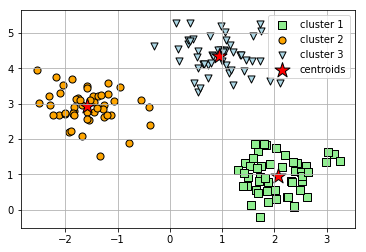

In [16]:
#KMeans++
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3, #nr. 3 cluster
          init='k-means++', #usiamo il kmeans ++
          n_init=10, #eseguiamo l'algoritmo 10 volte ogni volta con centroidi diversi
          max_iter=300, #massime iterazioni=300, massima tolleranza=0.0001 per convergenza
          tol=1e-04,
          random_state=0)
y_km=km.fit_predict(X)
plt.scatter(X[y_km==0, 0],
           X[y_km==0, 1],
           s=50, c='lightgreen',
           marker='s', edgecolor='black',
           label='cluster 1')
plt.scatter(X[y_km==1, 0],
           X[y_km==1, 1],
           s=50, c='orange',
           marker='o', edgecolor='black',
           label='cluster 2')
plt.scatter(X[y_km==2, 0],
           X[y_km==2, 1],
           s=50, c='lightblue',
           marker='v', edgecolor='black',
           label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
           km.cluster_centers_[:, 1],
           s=250, c='red',
           marker='*', edgecolor='black',
           label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()


In [18]:
#Distorsione (SSE dentro al cluster)
print('Distorsione: %.2f' % km.inertia_)

Distorsione: 72.48


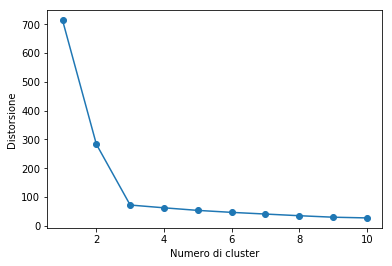

In [20]:
#Elbow method
distortions=[]
for i in range (1, 11):
    km=KMeans(n_clusters=i,
             init='k-means++',
             n_init=10,
             max_iter=300,
             random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Numero di cluster')
plt.ylabel('Distorsione')
plt.show()

In [21]:
#sotto 3 la distorsione aumenta molto quindi il numero ideale di cluster è 3

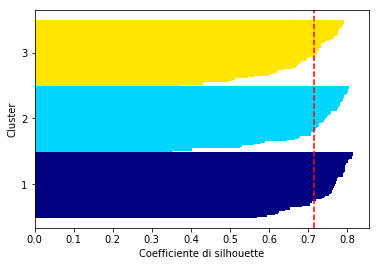

In [27]:
#Silhouette plots
km=KMeans(n_clusters=3,
          init='k-means++',
          n_init=10,
          max_iter=300,
          tol=1e-04,
          random_state=0)
y_km=km.fit_predict(X)
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels=np.unique(y_km)
n_clusters=cluster_labels.shape[0]
silhouette_vals=silhouette_samples(X,
                                  y_km,
                                  metric='euclidean')
y_ax_lower, y_ax_upper=0, 0
yticks= []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals=silhouette_vals[y_km==c]
    c_silhouette_vals.sort()
    y_ax_upper+= len(c_silhouette_vals)
    color=cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height=1.0,
            edgecolor='none',
            color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg=np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
           color='red',
           linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coefficiente di silhouette')
plt.show()

In [28]:
#i coefficienti sono simili e vicini a 1 quindi è un buon clustering

In [30]:
#clustering gerarchico
import pandas as pd
import numpy as np
np.random.seed(123)
variables=['X','Y','Z']
labels=['ID_0', 'ID_1','ID_2','ID_3','ID_4']
X=np.random.random_sample([5, 3])*10
df=pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [32]:
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering(n_clusters=3,
                          affinity='euclidean',
                          linkage='complete')
labels=ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [1 0 0 2 1]


In [1]:
#Ogni Id è classificato in uno dei 3 cluster 0, 1, 2

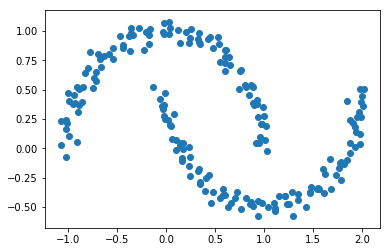

In [3]:
#DBSCAN:density-based spatial clustering of application with noise
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
X, y=make_moons(n_samples=200, #creiamo un dataset a mezzaluna
               noise=0.05,
               random_state=0)
plt.scatter(X[:,0], X[:, 1])
plt.show()

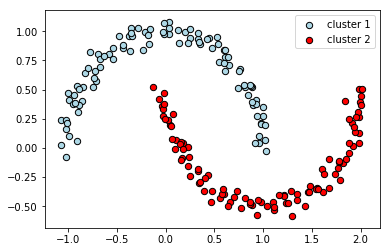

In [4]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.2, #raggio
         min_samples=5, #numero minimo di campioni per core
         metric='euclidean')
y_db=db.fit_predict(X)
plt.scatter(X[y_db==0, 0],
           X[y_db==0, 1],
           c='lightblue',
           edgecolor='black',
           marker='o',
           s=40, label='cluster 1')
plt.scatter(X[y_db==1, 0],
           X[y_db==1, 1],
           c='red',
           edgecolor='black',
           marker='o',
           s=40, label='cluster 2')
plt.legend()
plt.show()


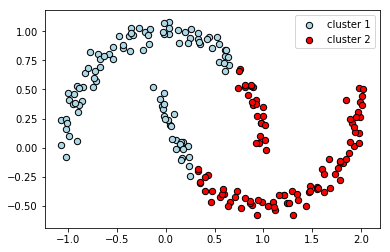

In [5]:
#il DBSCAN riesce a catturare questo dataset mentre il KMeans no
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2,
          init='k-means++',
          n_init=10,
          max_iter=300,
          tol=1e-04,
          random_state=0)
y_km=km.fit_predict(X)
plt.scatter(X[y_km==0, 0],
           X[y_km==0, 1],
           c='lightblue',
           edgecolor='black',
           marker='o',
           s=40, label='cluster 1')
plt.scatter(X[y_km==1, 0],
           X[y_km==1, 1],
           c='red',
           edgecolor='black',
           marker='o',
           s=40, label='cluster 2')
plt.legend()
plt.show()